En este notebook se define la función pendiente(src, dst) que permite calcular la pendiente del terreno a partir de un archivo que contenga el DEM en formato TIF. Se comprueba el funcionamiento de la función y se prueba la paralelización.

<h4>Descripción</h4>

Crea archivos TIF de pendiente a partir de los datos del DEM.

Argumentos:
src = Nombre del archivo de origen con información del DEM en formato TIF
dst = Nombre del archivo de destino con información de la pendiente en radianes en formato TIF

<h4>Metodología</h4>
Horn, B.K.P., 1981. Hill shading and the reflectance map. Proceedings of the IEEE 69, 14–47. doi:10.1109/PROC.1981.11918 Horn (1981) 
calculates the slope of a focal cell by using a central difference estimation of a surface fitted to the focal cell and its neighbours. 
The slope chosen is the maximum of this surface and can be returned in several formats.

<h4>Enlaces de interés</h4>
La documentación de la librería richdem se puede encontrar en la siguiente dirección:
https://richdem.readthedocs.io/en/latest/

Información sobre pendiente y orientación:

http://www.geo.uzh.ch/microsite/geo372/PDF/week4_geo372_terrain.pdf

https://www.earthdatascience.org/tutorials/get-slope-aspect-from-digital-elevation-model/

http://geologyandpython.com/dem-processing.html

In [15]:
import richdem 
import matplotlib.pyplot as plt #para visualizar las imágenes
from mpl_toolkits.mplot3d import Axes3D #para visualizar imágenes en 3D
import numpy as np

In [16]:
def visualiza(src):
    plt.imshow(richdem.LoadGDAL(src), interpolation='none')
    plt.colorbar()
    plt.show()

def visualiza3D(src,titulo="DEM",z="Elevación (m)",color='viridis'):
    dem=richdem.LoadGDAL(src)
    ny, nx = dem.shape
    x = np.linspace(0, 1, nx)
    y = np.linspace(0, 1, ny)
    xv, yv = np.meshgrid(x, y)
    fig = plt.figure(figsize=(10,5))
    ax = fig.add_subplot(111, projection='3d')
    dem3d=ax.plot_surface(xv,-yv,dem,cmap=color, linewidth=0)
    ax.set_title(titulo)
    ax.set_zlabel(z)
    plt.show()
               
def pendiente(src,dst=None):    
    try:
        fichero=richdem.LoadGDAL(src)
    except:
        print("No existe el archivo")
        return False
    try: 
        #se calcula la pendiente en radianes
        pendiente=richdem.TerrainAttribute(fichero, attrib='slope_radians') 
    except:
        print("El archivo no tiene un formato válido")
        return False
    if not dst:
        dst=src.replace(".tif","_pendiente.tif")        
    richdem.SaveGDAL(dst,pendiente) 
    print("Se ha calculado la pendiente: "+dst)
    return True

<IPython.core.display.Javascript object>


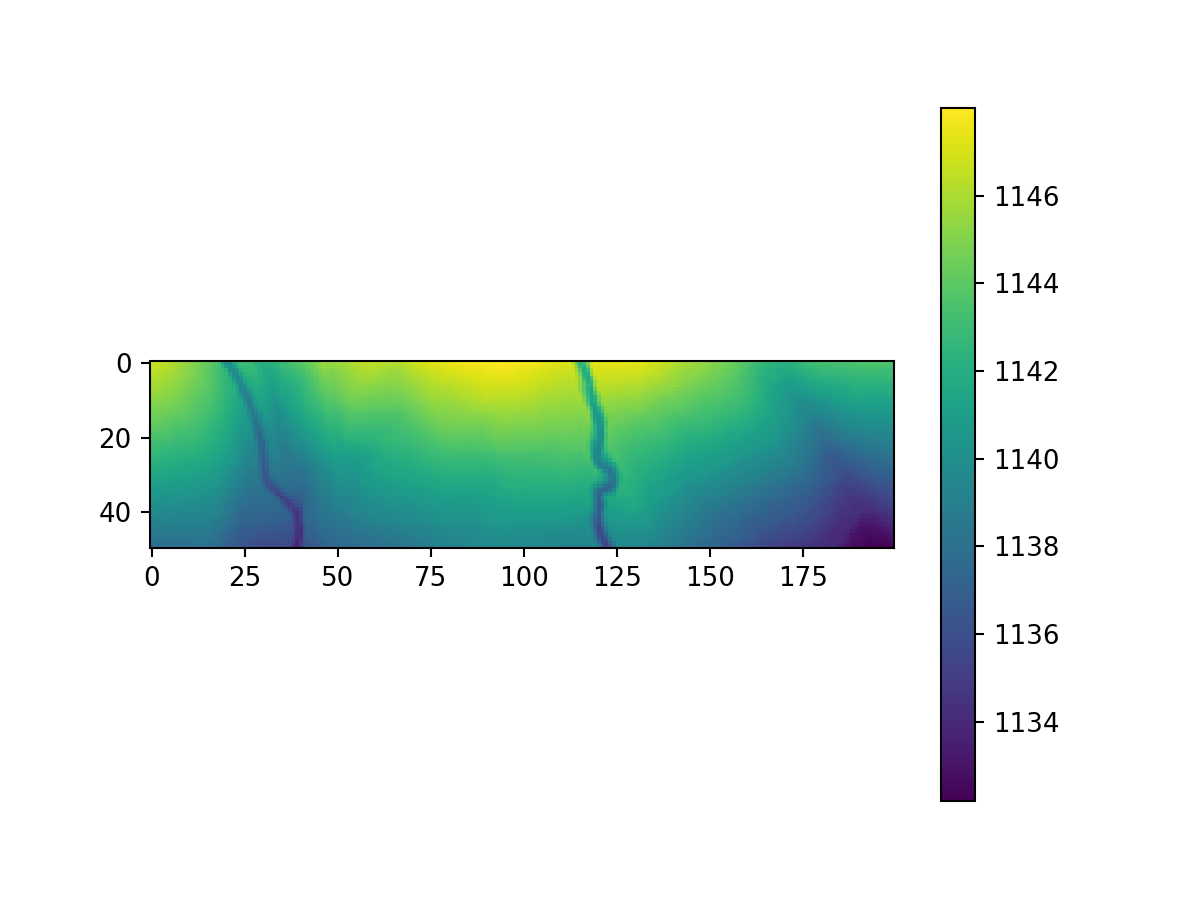

<IPython.core.display.Javascript object>


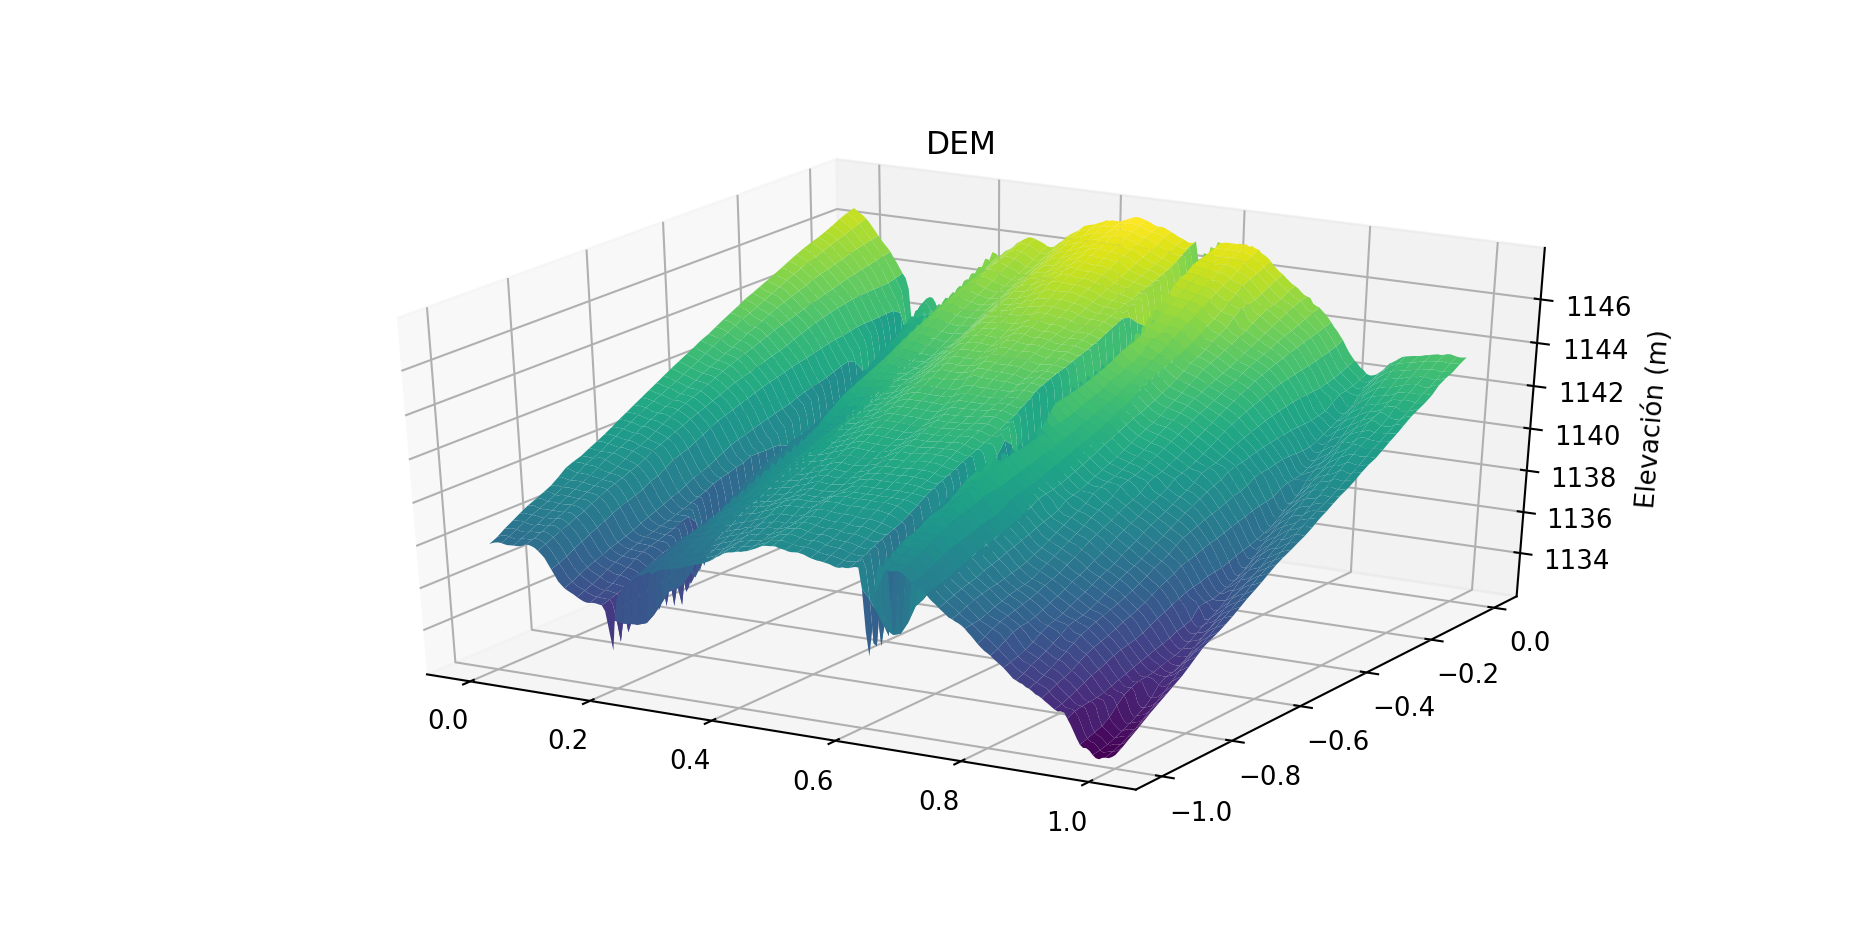

In [23]:
original="./datos/mdts/dem_out_1_-9.tif"
visualiza(original)
visualiza3D(original)

In [10]:
pendiente(original)

Se ha calculado la pendiente: ./mdts/dem_out_1_-9_pendiente.tif


True

<IPython.core.display.Javascript object>


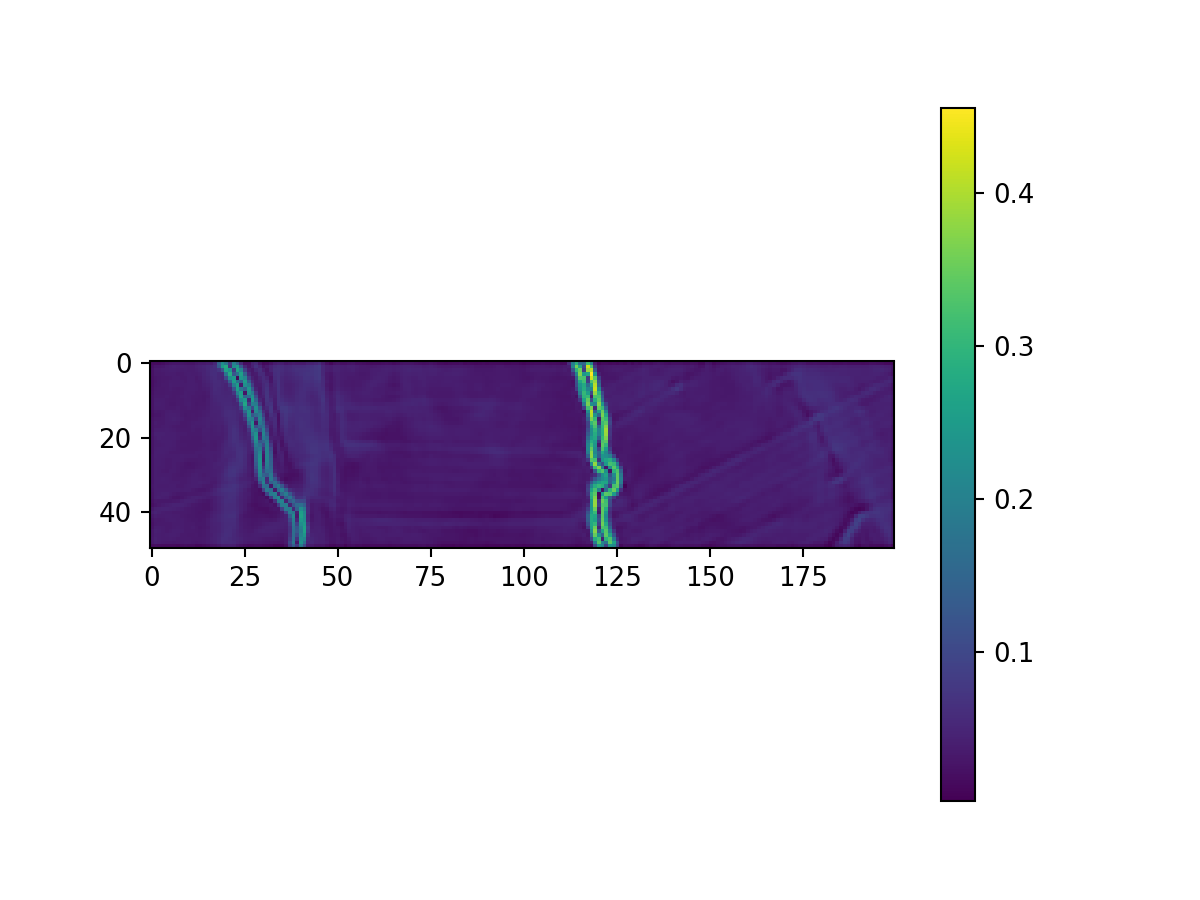

In [24]:
# se visualiza el archivo resultante
resultado="./datos/mdts/dem_out_1_-9_pendiente.tif"
visualiza(resultado)

<IPython.core.display.Javascript object>


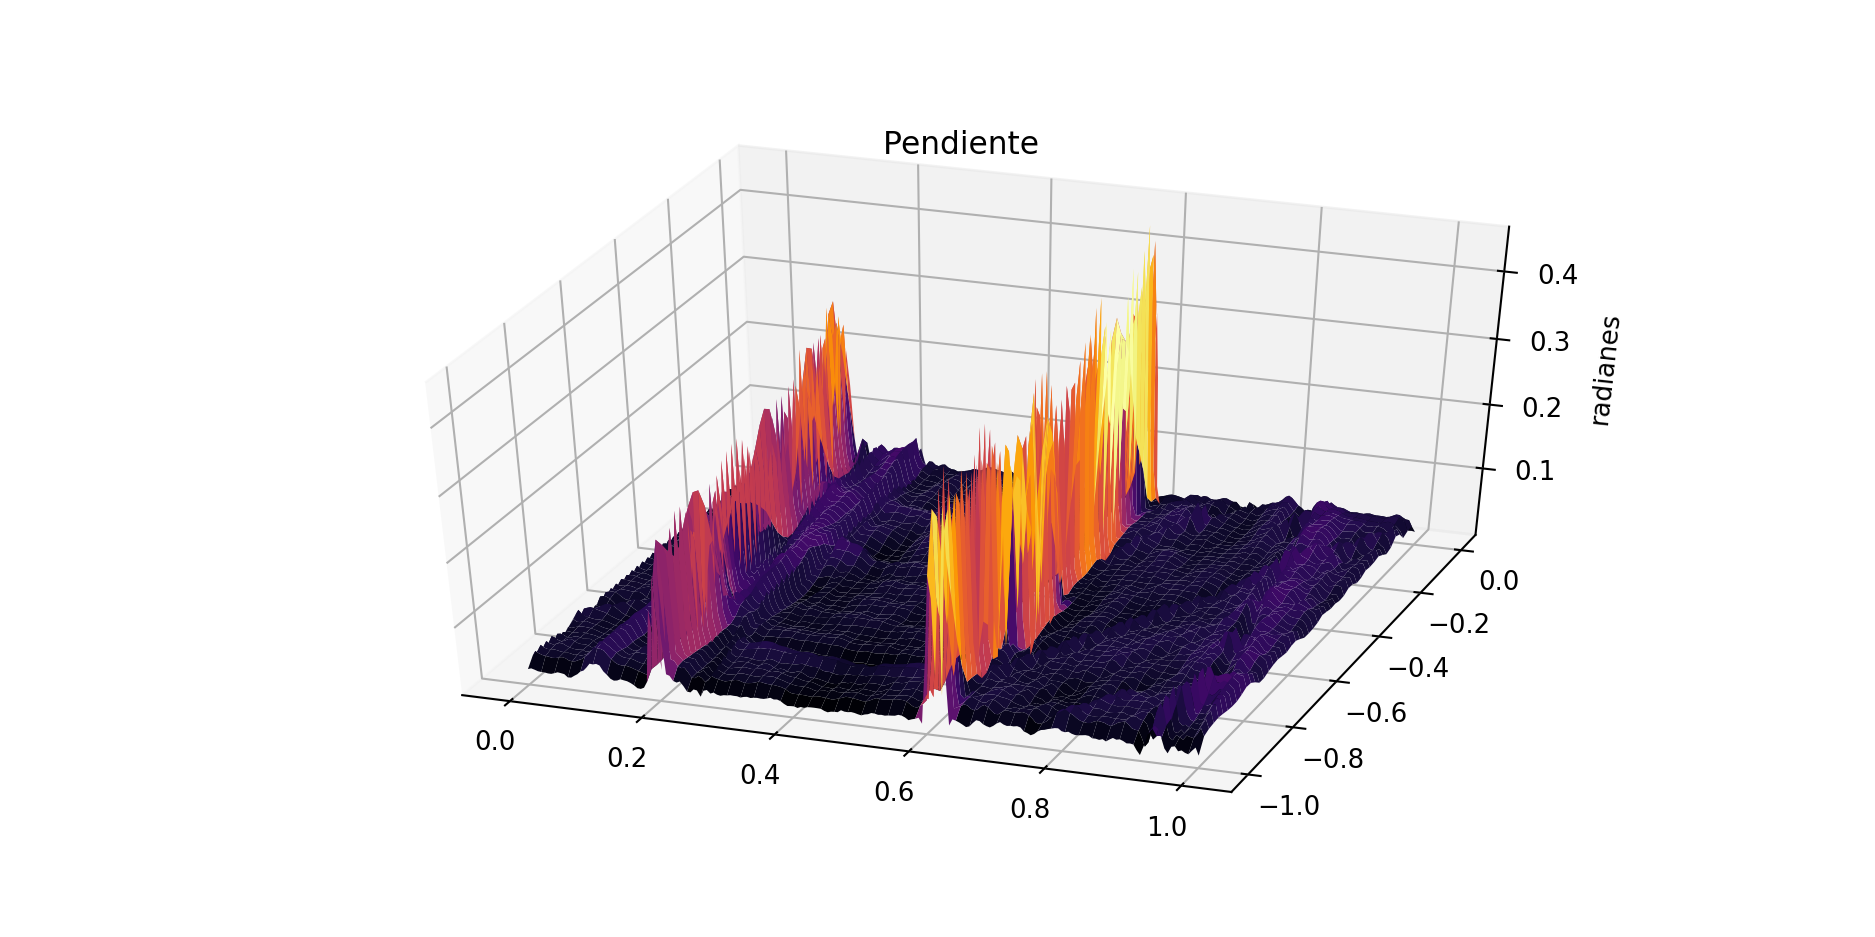

In [22]:
visualiza3D(resultado,titulo="Pendiente",z="radianes",color="inferno")

# Paralelización del script

In [25]:
from multiprocessing import Pool

In [28]:
cores=4
with Pool(cores) as p:
    p.map(pendiente,["./datos/mdts/dem_out_1_-7.tif","./datos/mdts/dem_out_2_-6.tif","archivo que no existe"])

No existe el archivo
Se ha calculado la pendiente: ./datos/mdts/dem_out_2_-6_pendiente.tif
Se ha calculado la pendiente: ./datos/mdts/dem_out_1_-7_pendiente.tif
